In [1]:
import cartopy

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import glob

import seaborn as sns
import xarray as xr
import cartopy as cp
save_dir = '/uio/hume/student-u89/hannasv/Desktop/figures_MASTERTHESIS/'
save_dir = '/home/hanna/images_simple_statsmodels/'

# Plot domain from Geostationary view

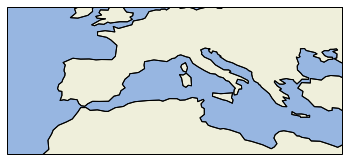

In [2]:
# Eumetsat 36 000km.
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=0.0, satellite_height=35785831, 
                   false_easting=0, false_northing=0, globe=None))
ax.coastlines()
#ax.gridlines(color='black', alpha=0.5)
ax.add_feature(cp.feature.OCEAN, zorder=0)
ax.add_feature(cp.feature.LAND, zorder=0, edgecolor='black')
ax.set_extent([-15, 29.25, 30, 55.25-0.75])

#ax.set_title('Domain')
#plt.subplots_adjust(left=0.01, bottom=0.01, right=0.9, top=0.9, wspace=0.1, hspace=0.1)
#plt.savefig(save_dir+"Domain.png", bbox_inches='tight')

# Illustrate kernal 

In [3]:
kernal    = 3
stride    = 1
dilation  = 2

In [4]:
ll = np.ones((kernal, kernal))

In [5]:
filters = np.repeat(np.arange(kernal) - np.median(np.arange(kernal)), kernal).reshape(kernal, kernal)
lon_filter = filters.transpose()*0.75
lat_filter = filters[::-1]*0.75

In [29]:
lon_filter

array([[-0.75,  0.  ,  0.75],
       [-0.75,  0.  ,  0.75],
       [-0.75,  0.  ,  0.75]])

In [30]:
lat_filter*dilation

array([[ 1.5,  1.5,  1.5],
       [ 0. ,  0. ,  0. ],
       [-1.5, -1.5, -1.5]])

In [31]:
z = np.pad(lon_filter, (0, 1), 'constant', constant_values=0)

In [22]:
def plot_one_kernal_map(la, lo, frame, kernal, stride = 1, dilation = 1, title = ''):
    # Eumetsat 36 000km.
    save_dir = '/uio/hume/student-u89/hannasv/ImagesForGifs/gifS{}D{}K{}/'.format(stride, dilation, kernal)
    save_dir = '/home/hanna/images_simple_statsmodels/'
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    #ax.gridlines(color='black', alpha=0.5)
    ax.add_feature(cp.feature.OCEAN, zorder=0)
    ax.add_feature(cp.feature.LAND, zorder=0, edgecolor='black')
    ax.set_extent([-15-0.75/2, 29.25-0.75/2, 30-0.75/2, 55.25-0.75/2])
    
    filters    = np.repeat(np.arange(kernal) - 
                           np.median(np.arange(kernal)), 
                           kernal).reshape(kernal, kernal)
    
    lon_filter = filters.transpose()*0.75
    lat_filter = filters[::-1]*0.75
    
    las = (la + lat_filter*dilation).ravel()
    los = (lo + lon_filter*dilation).ravel()

    for i in range(kernal**2):
        # Could add stride here and dialaion???? 
        ax.add_patch(mpatches.Rectangle(xy=[los[i], las[i]], width=.75, height=.75,
                                            facecolor='red',
                                            edgecolor = 'black',
                                            alpha=0.4,
                                            transform=ccrs.PlateCarree()
                                       ))

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                    name='admin_0_boundary_lines_land',
                                                    scale='50m',
                                                    facecolor='none')

    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.gridlines(color='black', alpha=0.5)
    plt.savefig(save_dir + 'Example_{}.png'.format(title))
    plt.show()
    return 

In [16]:
pwd

'/home/hanna/MS/notebooks/plotting'

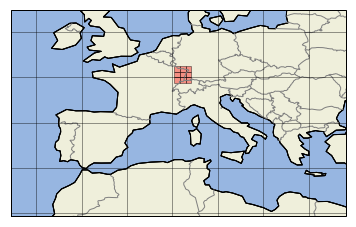

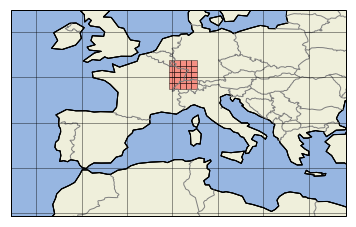

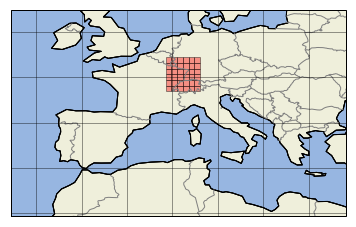

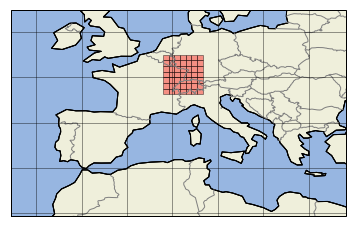

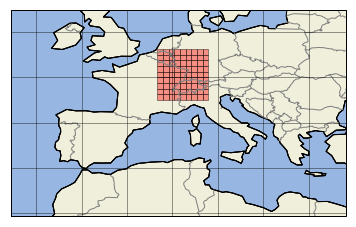

In [23]:
stride = 3
lons = np.arange(-15 - 0.75/2,   29.25 - 0.75/2, step = 0.75*stride) # grid defined based on the lower left corner
lats = np.arange( 30 -  0.75/2,  55.25 - 0.75/2, step = 0.75*stride)

lons = [10-3]
lats = [45+3]

frame = 0
for la in lats:
    for lo in lons:
        #print('{}, {}'.format(la, lo))
        for kernal in [3, 5, 6, 7, 9]:
            plot_one_kernal_map(la, lo, frame =frame, kernal=kernal, 
                                stride = stride,  dilation = 1, title = 'kernal_size_{}'.format(kernal))
            #frame+=1